In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

lung_cancer = pd.read_csv('/content/drive/My Drive/lungcancer.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lung_cancer = lung_cancer.drop(["Name","Surname"],axis=1)
X = lung_cancer.drop("Result",axis=1)
y = lung_cancer["Result"]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
best_accuracy = 0
best_k = 0
accuracy_list = []

In [ ]:
for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    avg_accuracy = scores.mean()
    accuracy_list.append(avg_accuracy)

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best K for KNN:", best_k)
print("Accuracy:", accuracy)

Best K for KNN: 1
Accuracy: 1.0


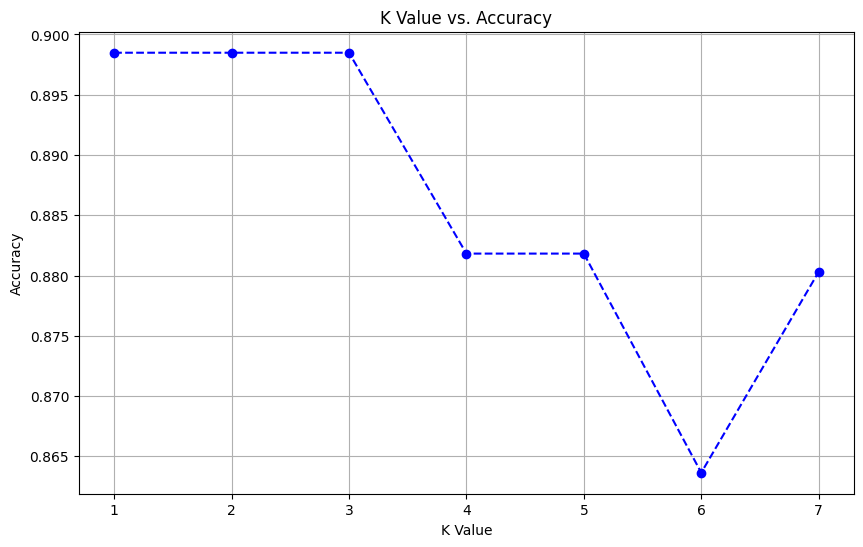

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), accuracy_list, marker='o', linestyle='--', color='b')
plt.title('K Value vs. Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Evaluate the model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best K for KNN:", best_k)
print("Accuracy:", accuracy)



Best K for KNN: 1
Accuracy: 1.0


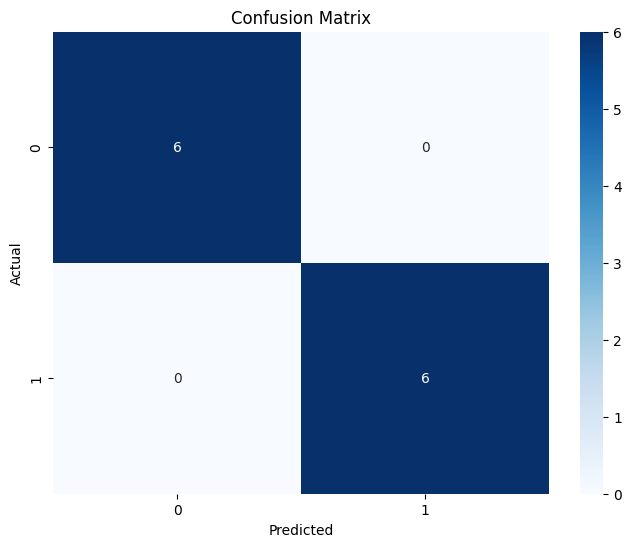

In [ ]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()